<a href="https://colab.research.google.com/github/OceanTurquoise/keiba/blob/main/keiba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import time
from tqdm.notebook import tqdm

In [ ]:
def scrape_race_results(race_id_list, pre_race_results={}):
    race_results = pre_race_results.copy()
    for race_id in tqdm(race_id_list):
        if race_id in race_results.keys():
            continue
        try:
          time.sleep(1)
          url = "https://db.netkeiba.com/race/" + race_id
          race_results[race_id] = pd.read_html(url)[0]
        except IndexError:
            continue
        except Exception as e:
          print(e)
          break
        except:
            break
    return race_results

In [ ]:
race_id_list = []
for place in range(1, 11, 1):
    for kai in range(1, 6, 1):
        for day in range(1, 13, 1):
            for r in range(1, 13, 1):
                race_id = "2019" + str(place).zfill(2) + str(kai).zfill(2) +\
		str(day).zfill(2) + str(r).zfill(2)
                race_id_list.append(race_id)

In [ ]:
test = scrape_race_results(race_id_list)
for key in test:
    test[key].index = [key] * len(test[key])
results = pd.concat([test[key] for key in test], sort=False) 
results.to_pickle('results.pickle')

In [ ]:
import pandas as pd

results = pd.read_pickle('results.pickle')

In [ ]:
results

In [ ]:
import requests
from bs4 import BeautifulSoup

race_id = '202210040601'
url = 'https://db.netkeiba.com/race/' + race_id
html = requests.get(url)
html.encoding = 'EUC-JP'
soup = BeautifulSoup(html.text,'html.parser')

In [ ]:
soup.find('div',attrs={'class':'data_intro'}).find_all("p")[0].text

In [ ]:
text = soup.find('div',attrs={'class':'data_intro'}).find_all("p")[0].text

In [ ]:
import re

re.findall(r'\w+', text)

In [ ]:
text2 = soup.find('div',attrs={'class':'data_intro'}).find_all("p")[1].text

In [ ]:
re.findall(r'\w+', text2)

In [ ]:
race_id_list = results.index.unique()[:50]

In [ ]:
import time
from tqdm import tqdm_notebook as tqdm

race_infos = {}
for race_id in tqdm(race_id_list):
  url = 'https://db.netkeiba.com/race/' + race_id
  html = requests.get(url)
  html.encoding = 'EUC-JP'
  soup = BeautifulSoup(html.text,'html.parser')

  texts = soup.find('div',attrs={'class':'data_intro'}).find_all("p")[0].text + \
    soup.find('div',attrs={'class':'data_intro'}).find_all("p")[1].text
  info = re.findall(r'\w+', texts)
  info_dict = {}
  for text in info:
    if text in ['芝','ダート']:
      info_dict['race_type'] = text
    if '障害' in text:
      info_dict['race_type'] = '障害'
    if 'm' in text:
      info_dict['course_len'] = int(re.findall(r'\d+',text)[0])
    if text in ['良','稍重','重','不良']:
      info_dict['ground_state'] = text
    if text in ['曇','晴','雨','小雨','小雪','雪']:
      info_dict['weather'] = text
    if '年' in text:
      info_dict['date'] = text
  race_infos[race_id] = info_dict
  time.sleep(1)

In [ ]:
race_infos

In [ ]:
pd.DataFrame(race_infos).T

In [ ]:
for key in race_infos.keys():
  print(key,len(race_infos[key]))

In [ ]:
def scrape_race_info(race_id_list):
  race_infos = {}
  for race_id in tqdm(race_id_list):
    try:
      url = 'https://db.netkeiba.com/race/' + race_id
      html = requests.get(url)
      html.encoding = 'EUC-JP'
      soup = BeautifulSoup(html.text,'html.parser')

      texts = soup.find('div',attrs={'class':'data_intro'}).find_all("p")[0].text + \
        soup.find('div',attrs={'class':'data_intro'}).find_all("p")[1].text
      info = re.findall(r'\w+', texts)
      info_dict = {}
      for text in info:
        if text in ['芝','ダート']:
          info_dict['race_type'] = text
        if '障害' in text:
          info_dict['race_type'] = '障害'
        if 'm' in text:
          info_dict['course_len'] = int(re.findall(r'\d+',text)[0])
        if text in ['良','稍重','重','不良']:
          info_dict['ground_state'] = text
        if text in ['曇','晴','雨','小雨','小雪','雪']:
          info_dict['weather'] = text
        if '年' in text:
          info_dict['date'] = text
      race_infos[race_id] = info_dict
      time.sleep(1)
    except IndexError:
      continue
    except:
      break
  return race_infos

In [ ]:
race_id_list = results.index.unique()

In [ ]:
race_infos = scrape_race_info(race_id_list)

In [ ]:
import pandas as pd

race_infos2 = race_infos
race_infos2_pd = pd.DataFrame(race_infos2.values(), index=race_infos2.keys()).T
race_infos2_pd.to_pickle('race_infos.pickle')

In [ ]:
import pandas as pd

race_infos3 = pd.read_pickle('race_infos.pickle')
results = pd.read_pickle('results.pickle')

In [ ]:
race_infos3

,201901010101,201901010102,201901010103,201901010104,201901010105,201901010106,201901010107,201901010108,201901010109,201901010110,...,201910021203,201910021204,201910021205,201910021206,201910021207,201910021208,201910021209,201910021210,201910021211,201910021212
course_len,1800,1000,2400,2000,1500,1700,1000,1200,1700,1500,...,1700,1200,1800,2000,1700,1200,1800,1700,1200,2600
weather,曇,曇,曇,晴,晴,晴,晴,晴,晴,晴,...,雨,小雨,小雨,小雨,小雨,小雨,小雨,小雨,曇,曇
race_type,芝,ダート,ダート,芝,芝,ダート,ダート,芝,ダート,芝,...,ダート,芝,芝,芝,ダート,芝,芝,ダート,芝,芝
ground_state,良,良,良,良,良,良,良,良,良,良,...,不良,重,重,重,不良,重,重,不良,重,重
date,2019年7月27日,2019年7月27日,2019年7月27日,2019年7月27日,2019年7月27日,2019年7月27日,2019年7月27日,2019年7月27日,2019年7月27日,2019年7月27日,...,2019年9月1日,2019年9月1日,2019年9月1日,2019年9月1日,2019年9月1日,2019年9月1日,2019年9月1日,2019年9月1日,2019年9月1日,2019年9月1日


In [ ]:
#results_addinfo = results.merge(pd.DataFrame(race_infos).T,left_index=True,right_index=True,how='inner')
results_addinfo = results.merge(race_infos3.T,left_index=True,right_index=True,how='inner')

In [ ]:
results_addinfo

,着順,枠番,馬番,馬名,性齢,斤量,騎手,タイム,着差,単勝,人気,馬体重,調教師,course_len,weather,race_type,ground_state,date
201901010101,1,1,1,ゴルコンダ,牡2,54.0,ルメール,1:48.3,NaN,1.4,1.0,518(-16),[東] 木村哲也,1800,曇,芝,良,2019年7月27日
201901010101,2,3,3,プントファイヤー,牡2,54.0,岩田康誠,1:50.1,大,3.5,2.0,496(-8),[東] 手塚貴久,1800,曇,芝,良,2019年7月27日
201901010101,3,4,4,ラグリマスネグラス,牡2,51.0,団野大成,1:50.9,5,46.6,6.0,546(+6),[東] 藤沢和雄,1800,曇,芝,良,2019年7月27日
201901010101,4,8,9,キタノコドウ,牡2,51.0,菅原明良,1:51.5,3.1/2,56.8,7.0,458(-8),[東] 高木登,1800,曇,芝,良,2019年7月27日
201901010101,5,5,5,ネモフィラブルー,牡2,54.0,川島信二,1:51.7,1.1/2,140.3,9.0,436(0),[西] 矢作芳人,1800,曇,芝,良,2019年7月27日
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201910021212,12,6,11,スリープレッピー,セ6,56.0,森裕太朗,2:45.7,1/2,120.3,15.0,458(+8),[西] 藤沢則雄,2600,曇,芝,重,2019年9月1日
201910021212,13,1,1,バリオラージュ,牡5,54.0,斎藤新,2:46.0,1.3/4,7.5,4.0,460(+2),[西] 角居勝彦,2600,曇,芝,重,2019年9月1日
201910021212,14,2,3,サンライズアミーゴ,牡4,54.0,亀田温心,2:46.2,1,99.2,12.0,478(+14),[西] 牧浦充徳,2600,曇,芝,重,2019年9月1日
201910021212,15,6,12,トロハ,牝3,52.0,武豊,2:46.2,クビ,17.5,8.0,468(+2),[西] 浜田多実,2600,曇,芝,重,2019年9月1日


In [ ]:
results_addinfo['course_len'].isnull().sum()

0

In [ ]:
import datetime

def preproccessing(results):
  df = results.copy()

  # 着順に数字以外の文字列が含まれているものを取り除く
  df = df[~(df["着順"].astype(str).str.contains("\D"))]
  df["着順"] = df["着順"].astype(int)

  # 性齢を性と年齢に分ける
  df["性"] = df["性齢"].map(lambda x: str(x)[0])
  df["年齢"] = df["性齢"].map(lambda x: str(x)[1:]).astype(int)

  # 馬体重を体重と体重変化に分ける
  df["体重"] = df["馬体重"].str.split("(", expand=True)[0].astype(int)
  df["体重変化"] = df["馬体重"].str.split("(", expand=True)[1].str[:-1].astype(int)

  # データをint, floatに変換
  df["単勝"] = df["単勝"].astype(float)

  # データをobject, intに変換
  df["course_len"] = df["course_len"].astype(int)

  # 不要な列を削除
  df.drop(["タイム", "着差", "調教師", "性齢", "馬体重"], axis=1, inplace=True)

  df['date'] = pd.to_datetime(df['date'],format='%Y年%m月%d日')

  return df

def split_data(df,test_size=0.3):
  sorted_id_list = df.sort_values('date').index.unique()
  train_id_list = sorted_id_list[:round(len(sorted_id_list) * (1-test_size))]
  test_id_list = sorted_id_list[round(len(sorted_id_list) * (1-test_size)):]
  train = df.loc[train_id_list]
  test = df.loc[test_id_list]
  return train,test

In [ ]:
results_p = preproccessing(results_addinfo)

In [ ]:
results_p.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47118 entries, 201901010101 to 201910021212
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   着順            47118 non-null  int64         
 1   枠番            47118 non-null  int64         
 2   馬番            47118 non-null  int64         
 3   馬名            47118 non-null  object        
 4   斤量            47118 non-null  float64       
 5   騎手            47118 non-null  object        
 6   単勝            47118 non-null  float64       
 7   人気            47118 non-null  float64       
 8   course_len    47118 non-null  int64         
 9   weather       47118 non-null  object        
 10  race_type     47118 non-null  object        
 11  ground_state  47118 non-null  object        
 12  date          47118 non-null  datetime64[ns]
 13  性             47118 non-null  object        
 14  年齢            47118 non-null  int64         
 15  体重            47118 non

In [ ]:
sorted_id_list = results_p.sort_values('date').index.unique()

In [ ]:
round(len(sorted_id_list) * 0.7)

2416

In [ ]:
train_id_list = sorted_id_list[:round(len(sorted_id_list) * 0.7)]
test_id_list = sorted_id_list[round(len(sorted_id_list) * 0.7):]

In [ ]:
train = results_p.loc[train_id_list]
test = results_p.loc[test_id_list]

In [ ]:
len(train)/len(results_p)

0.7030646462073942

In [ ]:
len(test)

13991

In [ ]:
len(results_p)

47118

In [ ]:
train,test= split_data(results_p,0.3)

In [ ]:
len(train)

33127

In [ ]:
len(test)

13991

In [ ]:
results_p.drop(['馬名'],axis=1,inplace=True)

In [ ]:
results_d = pd.get_dummies(results_p)

In [ ]:
results_d['rank'] = results_d['着順'].map(lambda x: x if x<4 else 4)

In [ ]:
train,test = split_data(results_d,0.3)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rank_1 = train['rank'].value_counts()[1]
rank_2 = train['rank'].value_counts()[2]
rank_3 = train['rank'].value_counts()[3]

rus = RandomUnderSampler(sampling_strategy={1:rank_1,2:rank_2,3:rank_3,4:rank_1},random_state=71)

X_train = train.drop(['着順','date','rank'],axis=1)
y_train = train['rank']
X_test = test.drop(['着順','date','rank'],axis=1)
y_test = test['rank']

X_train_rus,y_train_rus = rus.fit_resample(X_train,y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train_rus,y_train_rus)

print(clf.score(X_train,y_train), clf.score(X_test,y_test))

0.7229148428774111 0.5393467228932886


In [ ]:
results.head()

,着順,枠番,馬番,馬名,性齢,斤量,騎手,タイム,着差,単勝,人気,馬体重,調教師
201901010101,1,1,1,ゴルコンダ,牡2,54.0,ルメール,1:48.3,NaN,1.4,1.0,518(-16),[東] 木村哲也
201901010101,2,3,3,プントファイヤー,牡2,54.0,岩田康誠,1:50.1,大,3.5,2.0,496(-8),[東] 手塚貴久
201901010101,3,4,4,ラグリマスネグラス,牡2,51.0,団野大成,1:50.9,5,46.6,6.0,546(+6),[東] 藤沢和雄
201901010101,4,8,9,キタノコドウ,牡2,51.0,菅原明良,1:51.5,3.1/2,56.8,7.0,458(-8),[東] 高木登
201901010101,5,5,5,ネモフィラブルー,牡2,54.0,川島信二,1:51.7,1.1/2,140.3,9.0,436(0),[西] 矢作芳人


In [ ]:
results_p = preproccessing(results_addinfo)
results_p.head()

,着順,枠番,馬番,馬名,斤量,騎手,単勝,人気,course_len,weather,race_type,ground_state,date,性,年齢,体重,体重変化
201901010101,1,1,1,ゴルコンダ,54.0,ルメール,1.4,1.0,1800,曇,芝,良,2019-07-27,牡,2,518,-16
201901010101,2,3,3,プントファイヤー,54.0,岩田康誠,3.5,2.0,1800,曇,芝,良,2019-07-27,牡,2,496,-8
201901010101,3,4,4,ラグリマスネグラス,51.0,団野大成,46.6,6.0,1800,曇,芝,良,2019-07-27,牡,2,546,6
201901010101,4,8,9,キタノコドウ,51.0,菅原明良,56.8,7.0,1800,曇,芝,良,2019-07-27,牡,2,458,-8
201901010101,5,5,5,ネモフィラブルー,54.0,川島信二,140.3,9.0,1800,曇,芝,良,2019-07-27,牡,2,436,0


In [ ]:
results_p['rank'] = results_p['着順'].map(lambda x: x if x<4 else 4)
results_p.drop(['着順'],axis=1,inplace=True)

In [ ]:
results_p['rank'].value_counts()

4    36759
1     3457
3     3453
2     3449
Name: rank, dtype: int64

In [ ]:
results_p['rank'] = results_p['rank'].map(lambda x: 1 if x<4 else 0)

In [ ]:
results_p['rank'].value_counts()

0    36759
1    10359
Name: rank, dtype: int64

In [ ]:
results_p.drop(['馬名'],axis=1,inplace=True)
results_d = pd.get_dummies(results_p)

In [ ]:
results_d

,枠番,馬番,斤量,単勝,人気,course_len,date,年齢,体重,体重変化,...,race_type_ダート,race_type_芝,race_type_障害,ground_state_不良,ground_state_稍重,ground_state_良,ground_state_重,性_セ,性_牝,性_牡
201901010101,1,1,54.0,1.4,1.0,1800,2019-07-27,2,518,-16,...,0,1,0,0,0,1,0,0,0,1
201901010101,3,3,54.0,3.5,2.0,1800,2019-07-27,2,496,-8,...,0,1,0,0,0,1,0,0,0,1
201901010101,4,4,51.0,46.6,6.0,1800,2019-07-27,2,546,6,...,0,1,0,0,0,1,0,0,0,1
201901010101,8,9,51.0,56.8,7.0,1800,2019-07-27,2,458,-8,...,0,1,0,0,0,1,0,0,0,1
201901010101,5,5,54.0,140.3,9.0,1800,2019-07-27,2,436,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201910021212,6,11,56.0,120.3,15.0,2600,2019-09-01,6,458,8,...,0,1,0,0,0,0,1,1,0,0
201910021212,1,1,54.0,7.5,4.0,2600,2019-09-01,5,460,2,...,0,1,0,0,0,0,1,0,0,1
201910021212,2,3,54.0,99.2,12.0,2600,2019-09-01,4,478,14,...,0,1,0,0,0,0,1,0,0,1
201910021212,6,12,52.0,17.5,8.0,2600,2019-09-01,3,468,2,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
train, test = split_data(results_d)

In [ ]:
X_train = train.drop(['rank','date'],axis=1)
y_train = train['rank']
X_test = test.drop(['rank','date'],axis=1)
y_test = test['rank']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=100)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [ ]:
y_pred = rf.predict_proba(X_test)[:,1]

In [ ]:
y_pred

array([0.44, 0.64, 0.67, ..., 0.02, 0.43, 0.01])

In [ ]:
pip install jupyterthemes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 105.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 7.1 MB/s eta 0:00:00


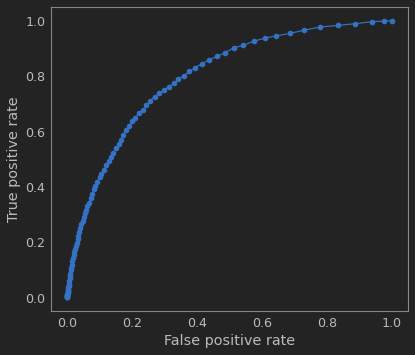

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

fpr,tpr,thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,marker='o')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid()
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred)

0.7967149439818251

In [ ]:
y_pred_train = rf.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred_train)

1.0

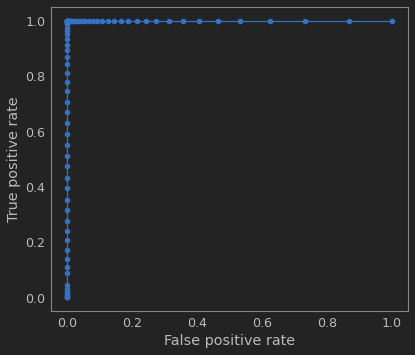

In [ ]:
fpr,tpr,thresholds = roc_curve(y_train,y_pred_train)
plt.plot(fpr,tpr,marker='o')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid()
plt.show()

In [ ]:
params = {
    'min_samples_split': 500,
    'max_depth': None,
    'n_estimators': 60,
    'criterion': 'entropy',
    'class_weight': 'balanced',
    'random_state': 100
}

rf = RandomForestClassifier(**params)
rf.fit(X_train,y_train)
y_pred_train = rf.predict_proba(X_train)[:,1]
y_pred = rf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_train,y_pred_train))
print(roc_auc_score(y_test,y_pred))

0.838306524227657
0.8060379740962669


In [ ]:
importances = pd.DataFrame({'features': X_train.columns, 'importance': rf.feature_importances_})

In [ ]:
importances.sort_values('importance', ascending=False)[:20]

,features,importance
3,単勝,0.413439
4,人気,0.360329
7,体重,0.016546
8,体重変化,0.010153
23,騎手_ルメール,0.010110
6,年齢,0.008884
5,course_len,0.007722
97,騎手_川田将雅,0.007667
1,馬番,0.007571
2,斤量,0.007163


In [ ]:
import lightgbm as lgb

params = {
    'num_leaves':4,
    'n_estimators':80,
    # 'min_data_in_leaf':500,
    'class_weight':'balanced',
    'random_state':100
}

lgb_clf = lgb.LGBMClassifier(**params)
lgb_clf.fit(X_train.values,y_train.values)
y_pred_train = lgb_clf.predict_proba(X_train)[:,1]
y_pred = lgb_clf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_train,y_pred_train))
print(roc_auc_score(y_test,y_pred))

0.818529539976364
0.811640619020559


In [ ]:
importances = pd.DataFrame({'features': X_train.columns, 'importance': lgb_clf.feature_importances_})
importances.sort_values('importance', ascending=False)[:20]

,features,importance
3,単勝,131
4,人気,23
7,体重,12
179,騎手_藤田菜七,8
6,年齢,8
8,体重変化,7
1,馬番,7
2,斤量,5
27,騎手_上野翔,4
5,course_len,4
